In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("data/ON_weather.csv")

In [3]:
df1

,Station Name,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm)
0,Hamilton,2020-01-01,1.4,-5.1,-1.9,0.0,0.0,0.0,2.0
1,Hamilton,2020-01-02,5.2,1.1,3.2,0.0,0.0,0.0,1.0
2,Hamilton,2020-01-03,6.9,2.3,4.6,0.0,0.0,0.0,1.0
3,Hamilton,2020-01-04,2.2,-1.3,0.5,4.2,0.6,3.6,2.0
4,Hamilton,2020-01-05,1.0,-1.9,-0.5,3.2,0.0,3.2,2.0
...,...,...,...,...,...,...,...,...,...
1825,Waterloo,2020-12-27,2.6,-4.5,-1.0,2.1,0.0,0.0,0.0
1826,Waterloo,2020-12-28,3.6,-4.2,-0.3,7.5,0.0,0.0,0.0
1827,Waterloo,2020-12-29,-3.6,-11.5,-7.6,7.5,0.0,0.0,0.0
1828,Waterloo,2020-12-30,3.7,-6.5,-1.4,10.0,0.0,0.0,0.0


In [4]:
df1 = df1.groupby(['Date/Time']).mean()

In [5]:
df2 = pd.read_csv("data/ON_covid+sd_score.csv")

In [6]:
df2.head()

,Reported Date,Confirmed Positive,Resolved,Deaths,Total Cases,Number of patients hospitalized with COVID-19,Number of patients in ICU due to COVID-19,"Number of patients in ICU, testing positive for COVID-19",Number of patients in ICU on a ventilator due to COVID-19,Num. of patients in ICU on a ventilator testing positive,...,country_region,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,sd_score,standarized_sd_score
0,2020-02-17,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,Canada,Ontario,-26.0,-37.0,70.0,-40.0,-72.0,16.0,121.0,54.329372
1,2020-02-18,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,Canada,Ontario,-1.0,12.0,-5.0,2.0,0.0,1.0,-7.0,32.597623
2,2020-02-19,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,Canada,Ontario,0.0,4.0,-4.0,-2.0,1.0,0.0,1.0,33.955857
3,2020-02-20,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,Canada,Ontario,4.0,4.0,3.0,0.0,2.0,0.0,-13.0,31.578947
4,2020-02-21,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,Canada,Ontario,1.0,-3.0,11.0,-1.0,-7.0,1.0,0.0,33.786078


In [7]:
df_3 = pd.merge(df1, df2, left_on='Date/Time', right_on = "Reported Date", how='right')

In [8]:
df_3

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Reported Date,Confirmed Positive,Resolved,...,country_region,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,sd_score,standarized_sd_score
0,-0.72,-9.00,-4.88,0.00,0.00,0.00,6.4,2020-02-17,2.0,1.0,...,Canada,Ontario,-26.0,-37.0,70.0,-40.0,-72.0,16.0,121.0,54.329372
1,4.26,-5.00,-0.36,3.52,0.04,3.48,8.4,2020-02-18,2.0,1.0,...,Canada,Ontario,-1.0,12.0,-5.0,2.0,0.0,1.0,-7.0,32.597623
2,0.14,-8.32,-4.10,0.00,0.00,0.00,6.8,2020-02-19,2.0,1.0,...,Canada,Ontario,0.0,4.0,-4.0,-2.0,1.0,0.0,1.0,33.955857
3,-5.68,-12.52,-9.14,0.00,0.00,0.00,6.2,2020-02-20,1.0,2.0,...,Canada,Ontario,4.0,4.0,3.0,0.0,2.0,0.0,-13.0,31.578947
4,-0.72,-12.92,-6.86,0.00,0.00,0.00,5.8,2020-02-21,0.0,3.0,...,Canada,Ontario,1.0,-3.0,11.0,-1.0,-7.0,1.0,0.0,33.786078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,1.82,-4.82,-1.52,1.14,0.68,0.04,6.2,2020-12-27,19861.0,147178.0,...,Canada,Ontario,-49.0,-28.0,17.0,-61.0,-27.0,11.0,159.0,60.780985
311,2.84,-4.40,-0.78,4.22,2.40,0.48,1.4,2020-12-28,19612.0,149329.0,...,Canada,Ontario,-45.0,-15.0,-8.0,-73.0,-72.0,26.0,239.0,74.363328
312,-2.68,-7.80,-5.26,1.50,0.00,0.00,0.6,2020-12-29,19891.0,151562.0,...,Canada,Ontario,-39.0,-3.0,11.0,-66.0,-60.0,22.0,179.0,64.176570
313,4.96,-5.32,-0.18,6.42,3.06,1.68,1.2,2020-12-30,20558.0,153799.0,...,Canada,Ontario,-39.0,1.0,-27.0,-67.0,-61.0,24.0,217.0,70.628183


In [9]:
df_3["Reported Date"] = df_3["Reported Date"].astype("datetime64[ns]")

In [10]:
df_3.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
       'Reported Date', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU due to COVID-19',
       'Number of patients in ICU, testing positive for COVID-19',
       'Number of patients in ICU on a ventilator due to COVID-19',
       'Num. of patients in ICU on a ventilator testing positive', 'New_cases',
       'New_hospitalized', 'New_icu', 'country_region', 'sub_region_1',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'sd_score',
       'standarized_sd_score'],
      dty

In [11]:
df_4 = pd.read_excel("data/ON_announcement.xlsx")

In [12]:
df_4

,Date,First_day,Stayhome_Order
0,2020-03-23,1,1
1,2020-03-24,0,1
2,2020-03-25,0,1
3,2020-03-26,0,1
4,2020-03-27,0,1
...,...,...,...
189,2020-05-01,0,1
190,2020-05-02,0,1
191,2020-05-03,0,1
192,2020-05-04,0,1


In [13]:
df_5 = pd.merge(df_3, df_4, left_on='Reported Date', right_on = "Date", how='left')

In [14]:
df_5.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
       'Reported Date', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU due to COVID-19',
       'Number of patients in ICU, testing positive for COVID-19',
       'Number of patients in ICU on a ventilator due to COVID-19',
       'Num. of patients in ICU on a ventilator testing positive', 'New_cases',
       'New_hospitalized', 'New_icu', 'country_region', 'sub_region_1',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'sd_score',
       'standarized_sd_score', 'Date', 'F

In [15]:
df_5.drop(['Max Temp (°C)', 'Min Temp (°C)', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU due to COVID-19',
       'Number of patients in ICU, testing positive for COVID-19',
       'Number of patients in ICU on a ventilator due to COVID-19',
       'Num. of patients in ICU on a ventilator testing positive',
          'country_region', 'sub_region_1','Date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'sd_score'], axis=1, inplace=True)

In [16]:
df_5.fillna(0, inplace = True)

In [17]:
df_5.isna().sum()

Mean Temp (°C)          0
Total Precip (mm)       0
Total Rain (mm)         0
Total Snow (cm)         0
Snow on Grnd (cm)       0
Reported Date           0
New_cases               0
New_hospitalized        0
New_icu                 0
standarized_sd_score    0
First_day               0
Stayhome_Order          0
dtype: int64

In [18]:
df_5

,Mean Temp (°C),Total Precip (mm),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Reported Date,New_cases,New_hospitalized,New_icu,standarized_sd_score,First_day,Stayhome_Order
0,-4.88,0.00,0.00,0.00,6.4,2020-02-17,0.0,0.0,0.0,54.329372,0.0,0.0
1,-0.36,3.52,0.04,3.48,8.4,2020-02-18,0.0,0.0,0.0,32.597623,0.0,0.0
2,-4.10,0.00,0.00,0.00,6.8,2020-02-19,0.0,0.0,0.0,33.955857,0.0,0.0
3,-9.14,0.00,0.00,0.00,6.2,2020-02-20,0.0,0.0,0.0,31.578947,0.0,0.0
4,-6.86,0.00,0.00,0.00,5.8,2020-02-21,0.0,0.0,0.0,33.786078,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,-1.52,1.14,0.68,0.04,6.2,2020-12-27,2005.0,68.0,-4.0,60.780985,0.0,1.0
311,-0.78,4.22,2.40,0.48,1.4,2020-12-28,1939.0,52.0,12.0,74.363328,0.0,1.0
312,-5.26,1.50,0.00,0.00,0.6,2020-12-29,2553.0,-11.0,9.0,64.176570,0.0,1.0
313,-0.18,6.42,3.06,1.68,1.2,2020-12-30,2923.0,313.0,18.0,70.628183,0.0,1.0


In [19]:
# Modify df_5

In [20]:
df_final = df_5

In [21]:
df_final["std_sd_score"] = df_final["standarized_sd_score"]

In [22]:
df_final

,Mean Temp (°C),Total Precip (mm),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Reported Date,New_cases,New_hospitalized,New_icu,standarized_sd_score,First_day,Stayhome_Order,std_sd_score
0,-4.88,0.00,0.00,0.00,6.4,2020-02-17,0.0,0.0,0.0,54.329372,0.0,0.0,54.329372
1,-0.36,3.52,0.04,3.48,8.4,2020-02-18,0.0,0.0,0.0,32.597623,0.0,0.0,32.597623
2,-4.10,0.00,0.00,0.00,6.8,2020-02-19,0.0,0.0,0.0,33.955857,0.0,0.0,33.955857
3,-9.14,0.00,0.00,0.00,6.2,2020-02-20,0.0,0.0,0.0,31.578947,0.0,0.0,31.578947
4,-6.86,0.00,0.00,0.00,5.8,2020-02-21,0.0,0.0,0.0,33.786078,0.0,0.0,33.786078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,-1.52,1.14,0.68,0.04,6.2,2020-12-27,2005.0,68.0,-4.0,60.780985,0.0,1.0,60.780985
311,-0.78,4.22,2.40,0.48,1.4,2020-12-28,1939.0,52.0,12.0,74.363328,0.0,1.0,74.363328
312,-5.26,1.50,0.00,0.00,0.6,2020-12-29,2553.0,-11.0,9.0,64.176570,0.0,1.0,64.176570
313,-0.18,6.42,3.06,1.68,1.2,2020-12-30,2923.0,313.0,18.0,70.628183,0.0,1.0,70.628183


In [23]:
#from 2020-02-17
df_final.drop(['standarized_sd_score', "Reported Date"], axis=1, inplace=True)

In [37]:
df_final.to_csv('data/ON_allinone.csv', index=False)

In [24]:
corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [20, 20]

<AxesSubplot:>

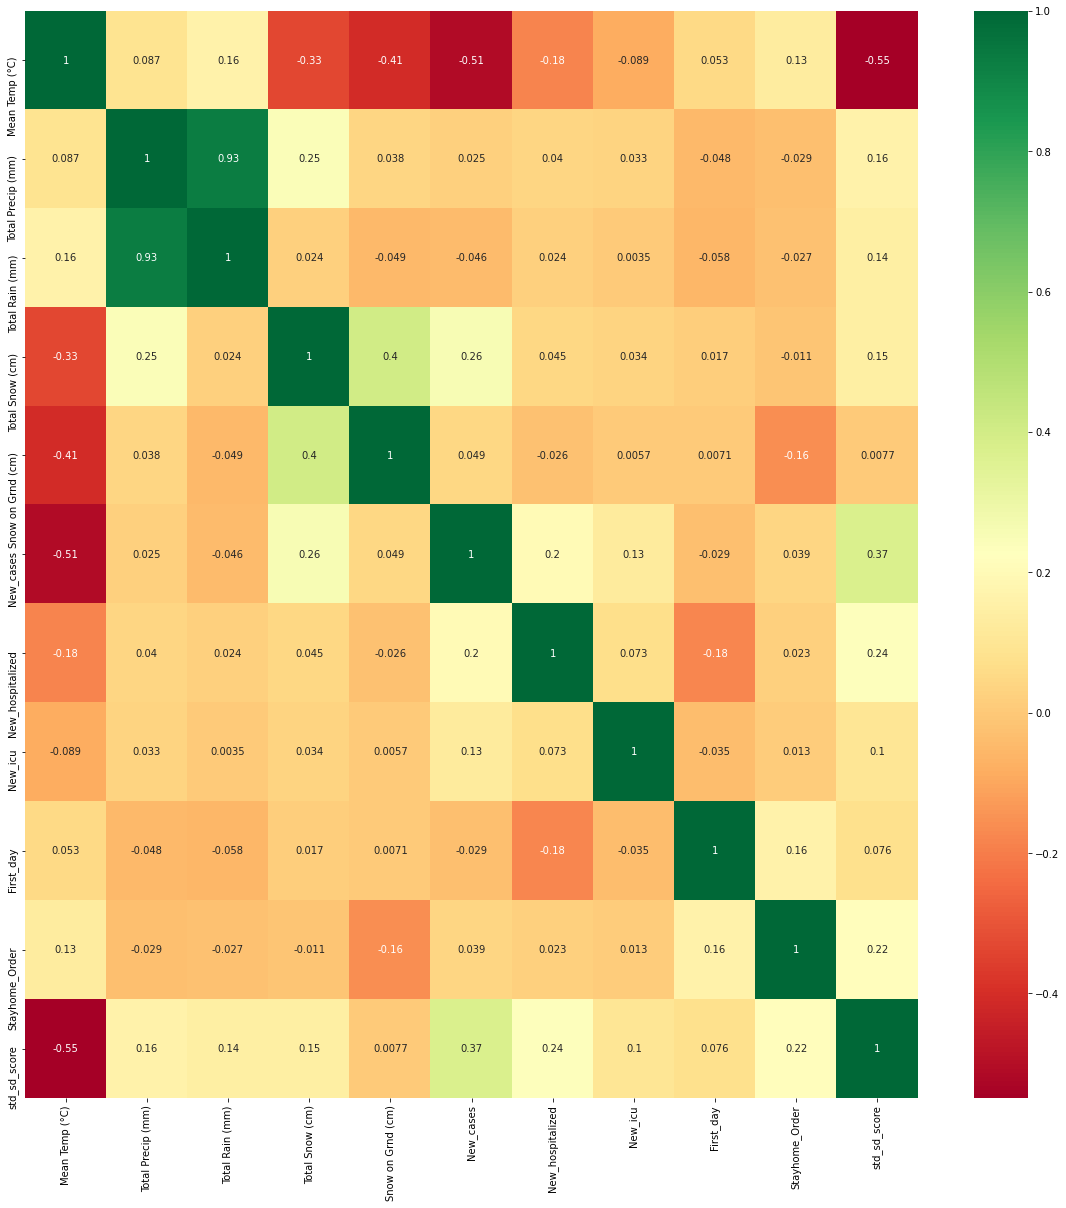

In [36]:
sns.heatmap(df_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
X = df_final.iloc[:, 0:10]
y = df_final.iloc[:, 10]

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [28]:
coeffs = pd.Series(model.coef_, index=X.columns)
coeffs

Mean Temp (°C)        0.475400
Total Precip (mm)    -0.476188
Total Rain (mm)       3.602432
Total Snow (cm)      -0.879442
Snow on Grnd (cm)     5.055271
New_cases             0.021073
New_hospitalized      0.083997
New_icu               0.049068
First_day             9.624650
Stayhome_Order       23.778064
dtype: float64

In [29]:
# feature selection

In [30]:
def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    corr_list = []
    feature_names = X.columns.tolist()
    
    for i in feature_names:
        corr = np.corrcoef(X[i], y)[0,1]
        corr_list.append(corr)
    
    corr_list = [0 if np.isnan(i) else i for i in corr_list]
    cor_feature = X.iloc[:, np.argsort(np.abs(corr_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_names]
    # Your code ends here
    return cor_support, cor_feature, corr_list

In [31]:
cor_support, cor_feature, corr_list = cor_selector(X, y,num_feats = 5)

In [32]:
cor_feature

['Total Precip (mm)',
 'Stayhome_Order',
 'New_hospitalized',
 'New_cases',
 'Mean Temp (°C)']

In [33]:
scores = pd.DataFrame(corr_list)
features = pd.DataFrame(X.columns)

In [34]:
feature_scores = pd.concat([features, scores], axis = 1)
feature_scores.columns = ["Features", "Scores"]
feature_scores

,Features,Scores
0,Mean Temp (°C),-0.548790
1,Total Precip (mm),0.164171
2,Total Rain (mm),0.141259
3,Total Snow (cm),0.146245
4,Snow on Grnd (cm),0.007714
5,New_cases,0.371608
6,New_hospitalized,0.236555
7,New_icu,0.103566
8,First_day,0.076283
9,Stayhome_Order,0.218031


In [38]:
feature_scores.to_csv('data/ON_best_features.csv', index=False)  